In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from main import N_SUFFICIENT_YIELD_G_GRAIN_PER_M2, CORN_PRICE_USD_PER_G_GRAIN

In [2]:
rollouts_by_control_period = {}
with open("3_days_rollouts.csv", "r") as f:
    rollouts_by_control_period[3] = pd.read_csv(f)
with open("9_days_rollouts.csv", "r") as f:
    rollouts_by_control_period[9] = pd.read_csv(f)
with open("36_days_rollouts.csv", "r") as f:
    rollouts_by_control_period[36] = pd.read_csv(f)
rollouts_by_control_period[3]

,penalty,deficit_cost,total_leaching_gN_per_m2,violated
0,0.000000,0.001225,0.010685,1.0
1,0.000000,0.001988,0.018944,0.0
2,0.000000,0.001502,0.000000,0.0
3,0.000000,0.001898,2.431674,1.0
4,0.000000,0.002152,0.000000,0.0
...,...,...,...,...
1195,0.402534,0.002394,0.055464,1.0
1196,0.402534,0.003593,0.323312,1.0
1197,0.402534,0.001965,0.026175,1.0
1198,0.402534,0.001342,0.022305,1.0


In [18]:
with open("rollout_rainfalls.pkl", "rb") as f:
    rainfalls = pkl.load(f)
rainfalls

[array([ 0.        ,  0.        , 30.67699859, 13.93950512,  0.        ,
         0.        ,  0.        ,  3.95742198,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 12.6820349 ,
         0.        , 32.78558037,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        12.39345128,  0.        ,  0.        ,  0.        ,  0.        ,
         9.31514936, 18.93447643,  0.        ,  0.        ,  0.        ,
         0.        ]),
 array([ 0.        ,  0.        ,  0.        , 20.5452875 ,  0.        ,
         0.        ,  0.        ,  0.        , 16.00885787,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 13.08905963, 13.29684107,  0.        ,  0.        ,
         2.5413099 ,  0.        ,  0.        , 67.44414273,  0.        ,
         0.        ,  0.        , 10.39988023,  0.        ,  0.        ,
        12.78453803,  0.    

In [4]:
[(rollout_rainfall[0] > 0 or rollout_rainfall[1] > 0 or rollout_rainfall[2] > 0) for rollout_rainfall in rainfalls]the initial forecast determines the 

[np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,

In [5]:
for period_days, rollouts_df in rollouts_by_control_period.items():
    rollouts_df["rainfall_idx"] = list(range(400)) * 3
    rollouts_df["control_period"] = [period_days] * 1200
    rollouts_df.set_index(["control_period", "penalty", "rainfall_idx"], inplace=True)

In [19]:
full_df = pd.concat(list(rollouts_by_control_period.values()))
full_df["relative_yield"] = 1.0 - (full_df["deficit_cost"]  / N_SUFFICIENT_YIELD_G_GRAIN_PER_M2 / CORN_PRICE_USD_PER_G_GRAIN)
full_df["rainy_start"] = [(rollout_rainfall[0] > 0 or rollout_rainfall[1] > 0 or rollout_rainfall[2] > 0) for rollout_rainfall in rainfalls] * int(len(full_df) / len(rainfalls))
full_df

deficit_cost  total_leaching_gN_per_m2  \
control_period penalty  rainfall_idx                                           
3              0.000000 0                 0.001225                  0.010685   
                        1                 0.001988                  0.018944   
                        2                 0.001502                  0.000000   
                        3                 0.001898                  2.431674   
                        4                 0.002152                  0.000000   
...                                            ...                       ...   
36             0.402534 395               0.259405                  0.001458   
                        396               0.260275                  0.004598   
                        397               0.259441                  0.000218   
                        398               0.067371                  0.002306   
                        399               0.261802                  0.000000   

                                      violated  relative_yield  rainy_start  
control_period penalty  rainfall_idx                                         
3              0.000000 0                  1.0        0.995437         True  
                        1                  0.0        0.992592        False  
                        2                  0.0        0.994403        False  
                        3                  1.0        0.992926        False  
                        4                  0.0        0.991980         True  
...                                        ...             ...          ...  
36             0.402534 395                0.0        0.033355         True  
                        396                0.0        0.030114         True  
                        397                0.0        0.033222         True  
                        398                1.0        0.748949        False  
                        399                0.0        0.024423         True  

[3600 rows x 5 columns]

In [20]:
full_df.groupby(["control_period", "penalty"]).mean()

deficit_cost  total_leaching_gN_per_m2  violated  \
control_period penalty                                                      
3              0.000000      0.002478                  0.378826    0.7300   
               0.201267      0.004930                  0.347197    0.5725   
               0.402534      0.011008                  0.305753    0.5400   
9              0.000000      0.003244                  0.310981    0.7375   
               0.201267      0.022385                  0.330115    0.4875   
               0.402534      0.029631                  0.308279    0.4625   
36             0.000000      0.004836                  0.365094    0.6025   
               0.201267      0.032872                  0.189291    0.5025   
               0.402534      0.191043                  0.007290    0.1100   

                         relative_yield  rainy_start  
control_period penalty                                
3              0.000000        0.990767         0.64  
               0.201267        0.981631         0.64  
               0.402534        0.958981         0.64  
9              0.000000        0.987913         0.64  
               0.201267        0.916584         0.64  
               0.402534        0.889581         0.64  
36             0.000000        0.981980         0.64  
               0.201267        0.877504         0.64  
               0.402534        0.288098         0.64

In [21]:
full_df.groupby(["control_period", "penalty"]).std()

deficit_cost  total_leaching_gN_per_m2  violated  \
control_period penalty                                                      
3              0.000000      0.001450                  1.026833  0.444515   
               0.201267      0.003294                  1.048711  0.495335   
               0.402534      0.009239                  0.934745  0.499022   
9              0.000000      0.000964                  0.833725  0.440544   
               0.201267      0.017170                  0.993326  0.500470   
               0.402534      0.021744                  0.965079  0.499216   
36             0.000000      0.003445                  1.064913  0.489994   
               0.201267      0.017124                  0.726416  0.500620   
               0.402534      0.092523                  0.024578  0.313282   

                         relative_yield  rainy_start  
control_period penalty                                
3              0.000000        0.005404     0.480601  
               0.201267        0.012276     0.480601  
               0.402534        0.034428     0.480601  
9              0.000000        0.003591     0.480601  
               0.201267        0.063982     0.480601  
               0.402534        0.081028     0.480601  
36             0.000000        0.012836     0.480601  
               0.201267        0.063809     0.480601  
               0.402534        0.344778     0.480601

In [22]:
full_df.groupby(["control_period", "penalty"]).mean()["deficit_cost"]

control_period  penalty 
3               0.000000    0.002478
                0.201267    0.004930
                0.402534    0.011008
9               0.000000    0.003244
                0.201267    0.022385
                0.402534    0.029631
36              0.000000    0.004836
                0.201267    0.032872
                0.402534    0.191043
Name: deficit_cost, dtype: float64

In [23]:
for name, group in full_df.groupby(['control_period', 'penalty']):
    print(name)

(np.int64(3), np.float64(0.0))
(np.int64(3), np.float64(0.2012671068887674))
(np.int64(3), np.float64(0.4025342137775348))
(np.int64(9), np.float64(0.0))
(np.int64(9), np.float64(0.2012671068887674))
(np.int64(9), np.float64(0.4025342137775348))
(np.int64(36), np.float64(0.0))
(np.int64(36), np.float64(0.2012671068887674))
(np.int64(36), np.float64(0.4025342137775348))


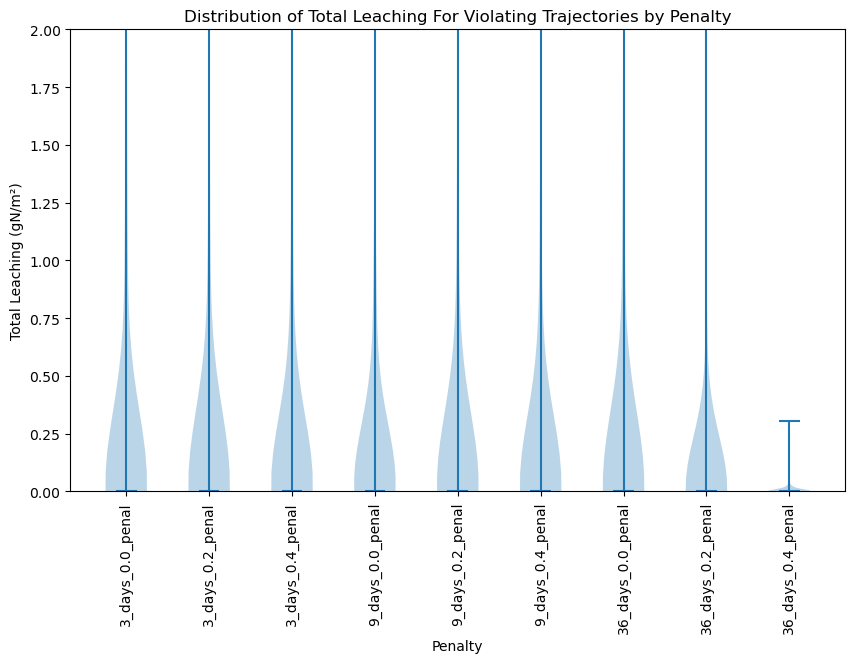

In [24]:
leaching_by_penalty = [group['total_leaching_gN_per_m2'].values for name, group in full_df.groupby(['control_period', 'penalty'])]

# Get the penalty labels for the x-axis
penalty_labels = [str(name[0]) + "_days_" + str(np.round(name[1], 1)) + "_penal" for name, group in full_df.groupby(['control_period', 'penalty'])]

# Create the violin plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.violinplot(leaching_by_penalty)

# Set x-axis labels
ax.set_xticks(range(1, len(penalty_labels) + 1))
ax.set_xticklabels(penalty_labels)
ax.tick_params(axis='x', labelrotation=90)

ax.set_ylabel('Total Leaching (gN/m²)')
ax.set_xlabel('Penalty')
ax.set_title('Distribution of Total Leaching For Violating Trajectories by Penalty')
ax.set_ylim([0,2])

plt.show()

In [25]:
full_df

deficit_cost  total_leaching_gN_per_m2  \
control_period penalty  rainfall_idx                                           
3              0.000000 0                 0.001225                  0.010685   
                        1                 0.001988                  0.018944   
                        2                 0.001502                  0.000000   
                        3                 0.001898                  2.431674   
                        4                 0.002152                  0.000000   
...                                            ...                       ...   
36             0.402534 395               0.259405                  0.001458   
                        396               0.260275                  0.004598   
                        397               0.259441                  0.000218   
                        398               0.067371                  0.002306   
                        399               0.261802                  0.000000   

                                      violated  relative_yield  rainy_start  
control_period penalty  rainfall_idx                                         
3              0.000000 0                  1.0        0.995437         True  
                        1                  0.0        0.992592        False  
                        2                  0.0        0.994403        False  
                        3                  1.0        0.992926        False  
                        4                  0.0        0.991980         True  
...                                        ...             ...          ...  
36             0.402534 395                0.0        0.033355         True  
                        396                0.0        0.030114         True  
                        397                0.0        0.033222         True  
                        398                1.0        0.748949        False  
                        399                0.0        0.024423         True  

[3600 rows x 5 columns]

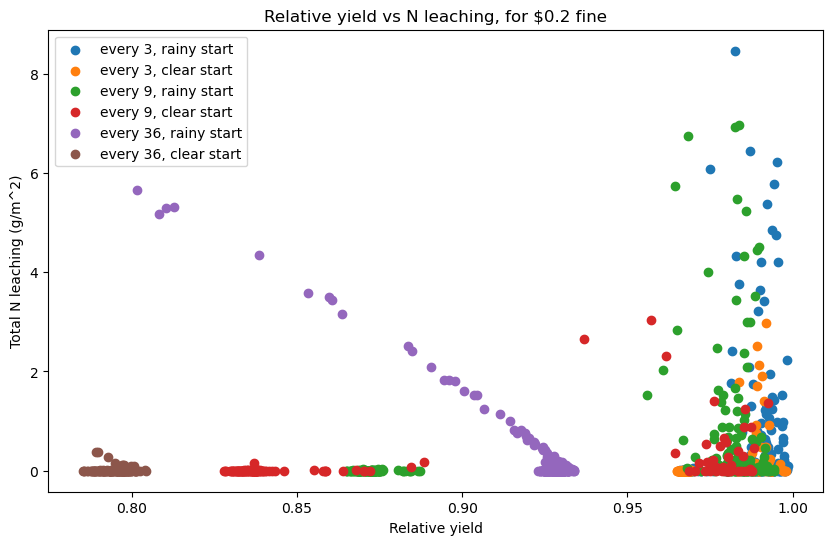

In [34]:
fine_USD = full_df.index.get_level_values(1).unique()[1]
fig, ax = plt.subplots(figsize=(10, 6))
for control_period_days in full_df.index.get_level_values(0).unique():
    selected_rollouts = full_df.loc[(control_period_days, fine_USD)]
    ax.scatter(selected_rollouts[selected_rollouts["rainy_start"]]["relative_yield"], selected_rollouts[selected_rollouts["rainy_start"]]["total_leaching_gN_per_m2"], label="every " + str(control_period_days) + ", rainy start")
    ax.scatter(selected_rollouts[~selected_rollouts["rainy_start"]]["relative_yield"], selected_rollouts[~selected_rollouts["rainy_start"]]["total_leaching_gN_per_m2"], label="every " + str(control_period_days) + ", clear start")
ax.set_ylabel("Total N leaching (g/m^2)")
ax.set_xlabel("Relative yield")
ax.set_title("Relative yield vs N leaching, for $" + str(round(fine_USD, 2)) +" fine")
ax.legend()
fig.savefig("leaching_vs_yield_across_frequencies.png", transparent=False, dpi=300, bbox_inches='tight')

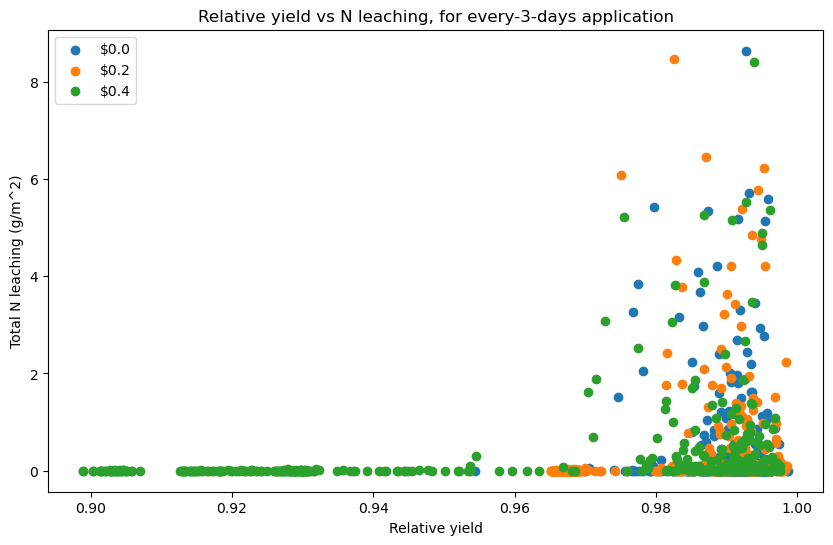

In [27]:
control_period_days = 3
fig, ax = plt.subplots(figsize=(10, 6))
for fine_USD in full_df.index.get_level_values(1).unique():
    ax.scatter(full_df.loc[(control_period_days, fine_USD)]["relative_yield"], full_df.loc[(control_period_days, fine_USD)]["total_leaching_gN_per_m2"], label="$" + str(round(fine_USD, 2)))
ax.set_ylabel("Total N leaching (g/m^2)")
ax.set_xlabel("Relative yield")
ax.set_title("Relative yield vs N leaching, for every-" + str(control_period_days) + "-days application")
ax.legend()

In [28]:
full_df.loc[(3,0.0)]["total_leaching_gN_per_m2"]

rainfall_idx
0      0.010685
1      0.018944
2      0.000000
3      2.431674
4      0.000000
         ...   
395    0.051566
396    0.537649
397    0.029424
398    0.073461
399    0.000000
Name: total_leaching_gN_per_m2, Length: 400, dtype: float64

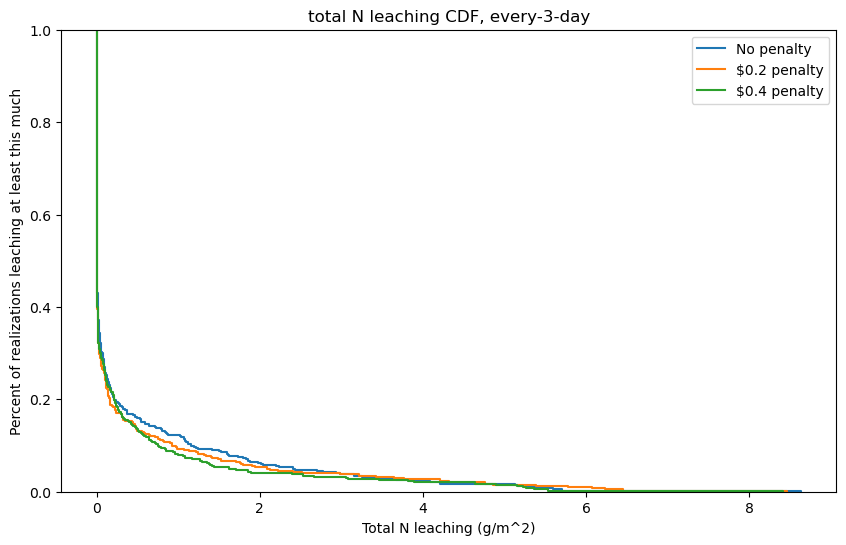

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.ecdf(full_df.loc[(3,0.0)]["total_leaching_gN_per_m2"], complementary=True, label="No penalty")
ax.ecdf(full_df.loc[(3,full_df.index.get_level_values(1).unique()[1])]["total_leaching_gN_per_m2"], complementary=True, label="$0.2 penalty")
ax.ecdf(full_df.loc[(3,full_df.index.get_level_values(1).unique()[2])]["total_leaching_gN_per_m2"], complementary=True, label="$0.4 penalty")
ax.set_xlabel("Total N leaching (g/m^2)")
ax.set_ylabel("Percent of realizations leaching at least this much")
ax.set_title("total N leaching CDF, every-3-day")
ax.legend()
# ax.ecdf(full_df.loc[(9,full_df.index.get_level_values(1).unique()[2])]["total_leaching_gN_per_m2"])
fig.savefig("total_leaching_cdf.png", transparent=True, dpi=300, bbox_inches='tight')

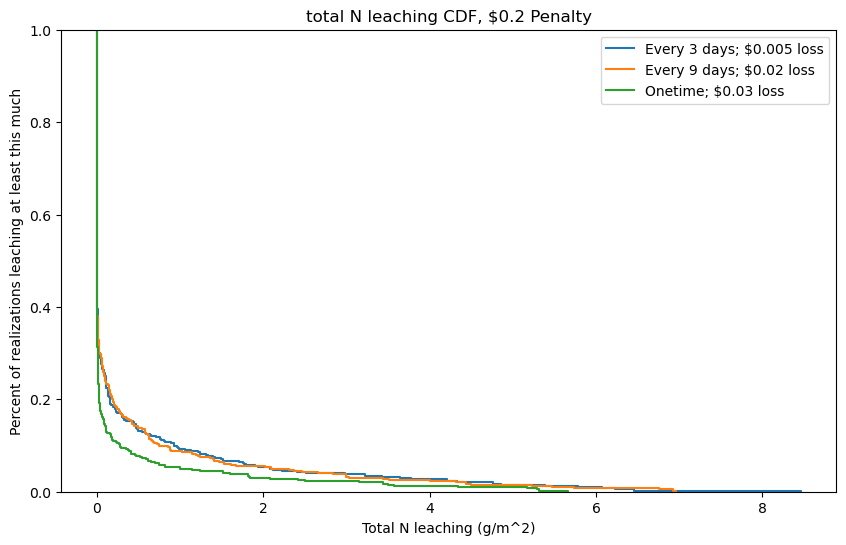

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.ecdf(full_df.loc[(3,full_df.index.get_level_values(1).unique()[1])]["total_leaching_gN_per_m2"], complementary=True, label="Every 3 days; $0.005 loss")
ax.ecdf(full_df.loc[(9,full_df.index.get_level_values(1).unique()[1])]["total_leaching_gN_per_m2"], complementary=True, label="Every 9 days; $0.02 loss")
ax.ecdf(full_df.loc[(36,full_df.index.get_level_values(1).unique()[1])]["total_leaching_gN_per_m2"], complementary=True, label="Onetime; $0.03 loss")
ax.set_xlabel("Total N leaching (g/m^2)")
ax.set_ylabel("Percent of realizations leaching at least this much")
ax.set_title("total N leaching CDF, $0.2 Penalty")
ax.legend()